In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('credit-data-training.xlsx', sheet_name="Sheet1")
train

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
5,Creditworthy,Some Balance,6,No Problems (in this bank),Home Related,362,< £100,< 1yr,4,None,NaN,3,52.0,Other Banks/Depts,2,More than 1,1,1,1,1
6,Non-Creditworthy,No Account,6,Some Problems,Home Related,433,£100-£1000,< 1yr,4,None,NaN,2,24.0,Other Banks/Depts,1,1,1,2,1,1
7,Creditworthy,No Account,6,Paid Up,Home Related,454,None,< 1yr,3,None,NaN,2,22.0,Other Banks/Depts,2,1,1,1,1,1
8,Creditworthy,No Account,6,Paid Up,Home Related,484,None,1-4 yrs,3,Yes,3.0,1,28.0,Other Banks/Depts,2,1,1,1,1,1
9,Creditworthy,Some Balance,6,Paid Up,Home Related,660,£100-£1000,1-4 yrs,2,None,4.0,1,23.0,Other Banks/Depts,1,1,1,1,1,1


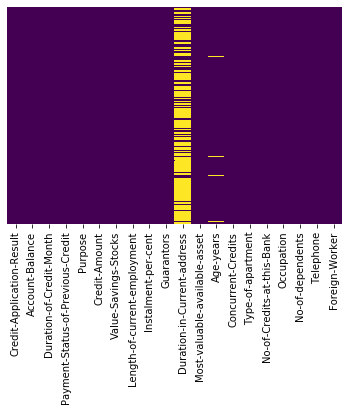

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
train.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

Nessa área queremos limpar os dados. Ou excluimos a variável, ou excluimos as linhas faltantes ou tratamos. Eu optei por tratar os dados. A duração num mesmo endereço, tem uma taxa de dados faltantes bem elevada, então é uma variável que pode ser excluída do modelo sem grandes problemas. Uma forma de descobrir isso é fazendo gráficos de todas as variáveis para chegar nessa conclusão. 
OBS: Na nanodegree em analista de dados da Udacity, muitas dessas variáveis foram excluídas do modelo. 

Abaixo valores referente a média, mediana e a moda. 

In [5]:
train['Duration-in-Current-address'].mean()



2.66025641025641

In [6]:
train['Duration-in-Current-address'].median()

2.0

In [7]:
train['Duration-in-Current-address'].mode()

0    4.0
dtype: float64

In [8]:
train['Age-years'].median()

33.0

In [9]:
train['Age-years'].mean()


35.63729508196721

In [10]:
train.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [11]:
train['Age-years'].fillna(train['Age-years'].median(), inplace=True)

In [12]:
train['Duration-in-Current-address'].fillna(train['Duration-in-Current-address'].median(), inplace=True)

In [13]:
train.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Duration-in-Current-address          0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [14]:
344/500


0.688

In [15]:
#Gosto de usar o info, para saber quais dados terei que transformar em variáveis numéricas para o modelo. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          500 non-null float64
Most-valuable-available-asset        500 non-null int64
Age-years                            500 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 no

In [16]:
del train['Concurrent-Credits']

In [17]:
Account_balance = pd.get_dummies(train['Account-Balance'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
Num_emprestimo = pd.get_dummies(train['No-of-Credits-at-this-Bank'],drop_first=True)
Tempo_trabalho = pd.get_dummies(train['Length-of-current-employment'],drop_first=True)
Resultado = pd.get_dummies(train['Credit-Application-Result'],drop_first=True)
Fiadores = pd.get_dummies(train['Guarantors'],drop_first=True)
Emprestimos = pd.get_dummies(train['No-of-Credits-at-this-Bank'],drop_first=True)

In [18]:
train.drop(['Account-Balance','No-of-Credits-at-this-Bank','Length-of-current-employment','Credit-Application-Result','Guarantors','No-of-Credits-at-this-Bank'],axis=1,inplace=True)

In [19]:
train = pd.concat([train,Account_balance,Num_emprestimo,Tempo_trabalho,Resultado,Fiadores,Emprestimos],axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
pspc = train['Payment-Status-of-Previous-Credit']
set(pspc)
label_encoder = LabelEncoder()
PSPC = label_encoder.fit_transform(pspc)
PSPC
train['Payment-Status-of-Previous-Credit'] = PSPC

In [22]:
#Purpose é igual ao objetivo
#Home_Related=355, Used_car=83, NewCar=47, Other=15
purpose = train['Purpose']
set(purpose)
label_encoder = LabelEncoder()
Purpose = label_encoder.fit_transform(purpose)
Purpose
train['Purpose'] = Purpose

In [23]:
#Poupança
#None=298 100-1000 libras=154 <100=48
vss = train['Value-Savings-Stocks']
set(vss)
label_encoder = LabelEncoder()
VSS = label_encoder.fit_transform(vss)
VSS
train['Value-Savings-Stocks'] = VSS

In [24]:
train.head()

,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,...,No-of-dependents,Telephone,Foreign-Worker,Some Balance,More than 1,4-7 yrs,< 1yr,Non-Creditworthy,Yes,More than 1
0,4,1,2,1494,2,1,2.0,1,33.0,2,...,2,1,2,1,0,0,1,0,0,0
1,4,1,0,1494,2,1,2.0,1,29.0,2,...,2,1,2,1,0,0,1,0,0,0
2,4,0,0,1544,1,2,1.0,1,42.0,2,...,2,1,1,1,1,0,0,0,0,1
3,4,0,0,3380,1,1,1.0,1,37.0,2,...,2,1,1,1,0,0,0,0,0,0
4,6,1,0,343,1,4,1.0,1,27.0,2,...,1,1,1,0,0,0,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Non-Creditworthy',axis=1), 
                                                    train['Non-Creditworthy'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting Model Logistic

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\loja746\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logmodel.score(X_train, y_train)

0.8142857142857143

In [30]:
predictions = logmodel.predict(X_test)

# Avaliação Modelo Logístico


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       103
           1       0.50      0.30      0.37        47

    accuracy                           0.69       150
   macro avg       0.61      0.58      0.58       150
weighted avg       0.66      0.69      0.66       150



In [33]:
pred = logmodel.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred))

[[89 14]
 [33 14]]


# Model KNN

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(train.drop('Non-Creditworthy',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
scaled_features = scaler.transform(train.drop('Non-Creditworthy',axis=1))

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Non-Creditworthy'],
                                                    test_size=0.30)

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)

In [106]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [107]:
knn.score(X_train, y_train)

0.8514285714285714

# Previsão e Avaliação Modelo KNN


In [108]:
pred = knn.predict(X_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       112
           1       0.44      0.39      0.42        38

    accuracy                           0.72       150
   macro avg       0.62      0.61      0.62       150
weighted avg       0.71      0.72      0.71       150



In [111]:
print(confusion_matrix(y_test,pred))

[[93 19]
 [23 15]]


# Escolhendo o melhor valor de K

In [112]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

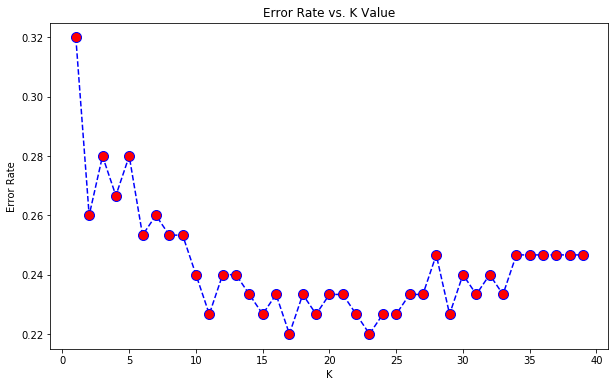

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Com esse método conseguimos ter uma melhora significativa aumento o k de 1 para 5. A priori é o melhor modelo possível de KNN. 


In [114]:
knn = KNeighborsClassifier(n_neighbors=17)

In [115]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [116]:
knn.score(X_train, y_train)

0.7571428571428571

In [117]:
pred = knn.predict(X_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       112
           1       0.67      0.26      0.38        38

    accuracy                           0.78       150
   macro avg       0.73      0.61      0.62       150
weighted avg       0.76      0.78      0.74       150



In [91]:
print(confusion_matrix(y_test,pred))

[[88 17]
 [29 16]]


# Training a Decision Tree Model

In [121]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Non-Creditworthy',axis=1), 
                                                    train['Non-Creditworthy'], test_size=0.30, 
                                                    random_state=101)

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtree = DecisionTreeClassifier()

In [124]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Previsões e avaliação da árvore de decisão

In [125]:
predictions = dtree.predict(X_test)

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       103
           1       0.49      0.38      0.43        47

    accuracy                           0.68       150
   macro avg       0.61      0.60      0.60       150
weighted avg       0.66      0.68      0.67       150



In [128]:
print(confusion_matrix(y_test,predictions))

[[84 19]
 [29 18]]


# Treinando o modelo de florestas aleatórias

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc = RandomForestClassifier(n_estimators=600)

In [132]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Previsões e Avaliação

In [133]:
predictions = rfc.predict(X_test)

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       103
           1       0.61      0.23      0.34        47

    accuracy                           0.71       150
   macro avg       0.67      0.58      0.58       150
weighted avg       0.69      0.71      0.67       150



In [136]:
print(confusion_matrix(y_test,predictions))

[[96  7]
 [36 11]]
